Task 1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataframes = []

for year in range(1880, 2023):
    df_yearly = pd.read_csv(f'names/yob{year}.txt', names=['name', 'gender', 'number'])
    df_yearly['year'] = year
    dataframes.append(df_yearly)

df = pd.concat(dataframes)
df.head(10)

,name,gender,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


Task 2

In [3]:
df['last_letter'] = df['name'].str[-1]
df.head(10)

,name,gender,number,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
5,Margaret,F,1578,1880,t
6,Ida,F,1472,1880,a
7,Alice,F,1414,1880,e
8,Bertha,F,1320,1880,a
9,Sarah,F,1288,1880,h


Task 3

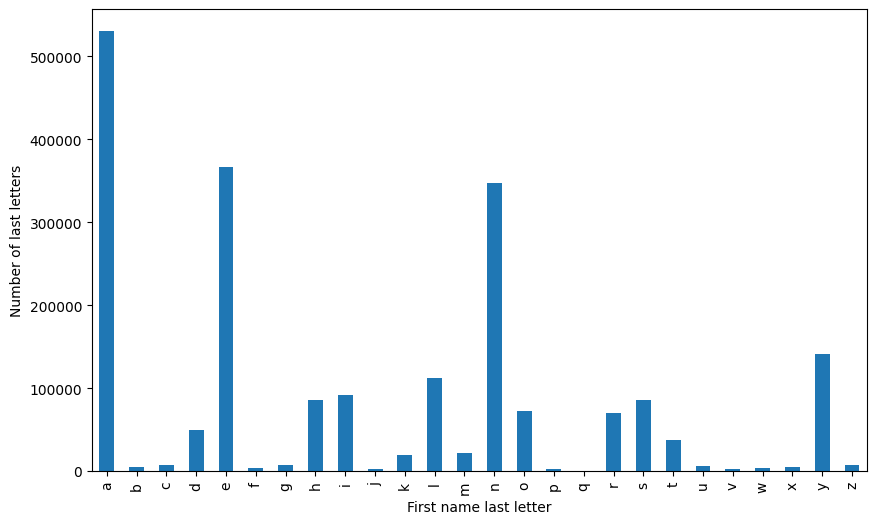

In [4]:
plt.figure(figsize=(10, 6))
df['last_letter'].value_counts().sort_index().plot.bar()
plt.xlabel('First name last letter')
plt.ylabel('Number of last letters')
plt.savefig('last_letters_counted.png', dpi=150)

Task 4

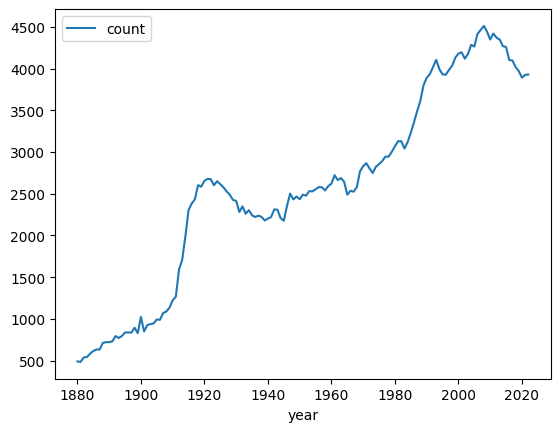

In [5]:
last_letter_selected = df[df['last_letter']=="e"]
last_letter_selected_yearly_counted = last_letter_selected.groupby('year').size().reset_index(name='count')
last_letter_selected_yearly_counted.head(10)
last_letter_selected_yearly_counted.plot(x='year', y='count', kind='line')
plt.savefig('letter_e.png', dpi=150)

Task 5

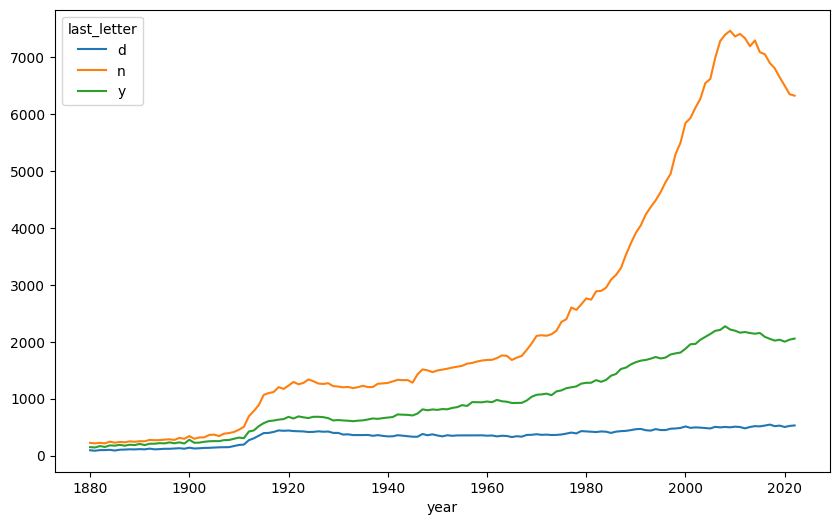

In [6]:
year_group = df.groupby(['last_letter', 'year'])['name'].count()
year_group.unstack(0)

year_group.unstack(0)[['d', 'n', 'y']].plot(figsize=(10, 6), kind='line')
plt.savefig('last_letters.png', dpi=150)

Task 6

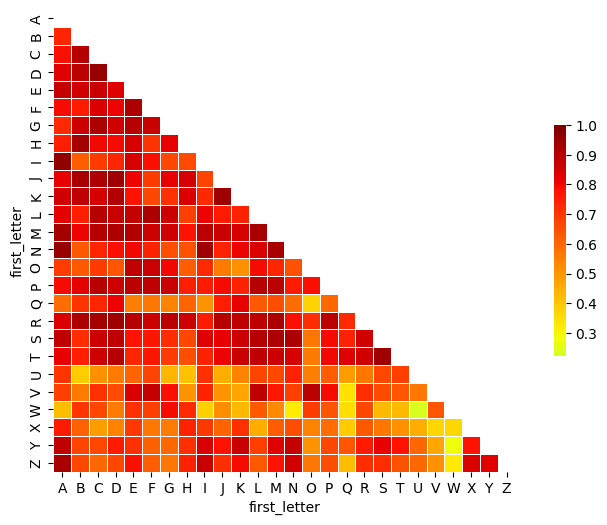

In [7]:
df['first_letter'] = df['name'].str[0]

year_group_first_last = df.groupby(['first_letter', 'last_letter', 'year'])['name'].count()
unstacked_group = year_group_first_last.unstack(0)

corr=unstacked_group.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 6))
cmap = 'jet'

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('heatmap.png', dpi=150)